In [97]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import geopandas as gpd

(3, 4282, 8899)


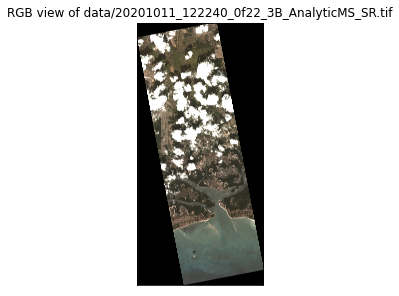

In [98]:
def display_rgb(filename, vmin=0, vmax=3000):
    ax = _display(filename, [3, 2, 1], vmin, vmax)
    ax.set(title='RGB view of {}'.format(filename))
    plt.show()

def display_cir(filename, vmin=0, vmax=5000):
    ax = _display(filename, [4, 2, 2], vmin, vmax)
    ax.set(title='False Color Infrared view of\n{}'.format(filename))
    plt.show()

def _display(filename, bands, vmin, vmax):
    with rio.open(filename, 'r') as src:
        data = src.read(bands, masked=True)
        print(data.shape)
        #data = src.read(bands, masked=True, out_shape=(3, int(src.height / 4), int(src.width / 4)))

    data = np.swapaxes(data, 0, -1)
    data = np.clip(data, vmin, vmax).astype('float32') / float(vmax - vmin)

    fig, ax = plt.subplots(constrained_layout=True)
    ax.imshow(data)
    ax.set(xticks=[], yticks=[])
    return ax

fp = r'data/20201011_122240_0f22_3B_AnalyticMS_SR.tif'

display_rgb(fp)

In [99]:
fp = r'data/20201011_122240_0f22_3B_AnalyticMS_SR.tif'
data = rasterio.open(fp)
band_blue = data.read(3)
data.crs

CRS.from_epsg(32725)

In [100]:
aoi = r'test_geometry.geojson'
aoi_df = gpd.read_file(aoi)

In [101]:
aoi_df.total_bounds

array([-34.92207856,  -7.85276505, -34.82550831,  -7.59214073])

In [102]:
aoi_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [103]:
aoi_df = aoi_df.to_crs(crs=data.crs)
aoi_df.crs

<Projected CRS: EPSG:32725>
Name: WGS 84 / UTM zone 25S
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [116]:
aoi_bbox = aoi_df.total_bounds

################ enlarge window!!
#aoi_bbox[0] = aoi_bbox[0]-500000
#works, window performs intersection
##############################

print(f' aoi_bbox(via geojson): {aoi_bbox}, data bounds: {data.bounds}')


aoi_window = data.window(*aoi_bbox)
aoi_window

 aoi_bbox(via geojson): [ 288074.46334392 9131540.40955765  298602.68157371 9160321.69252901], data bounds: BoundingBox(left=277932.0, bottom=9145185.0, right=304629.0, top=9158031.0)


Window(col_off=3380.8211146414105, row_off=-763.5641763349995, width=3509.4060765940667, height=9593.760990452487)

In [117]:
def display_window_rgb(filename, window, vmin=0, vmax=3000):
    ax = _display_window(filename, [3, 2, 1], window, vmin, vmax)
    ax.set(title='RGB view of {}'.format(filename))
    plt.show()

def _display_window(filename, bands, window, vmin, vmax):
    with rio.open(filename, 'r') as src:
        data = src.read(bands, window=window, masked=True)
        print(data.shape)
        #data = src.read(bands, masked=True, out_shape=(3, int(src.height / 4), int(src.width / 4)))

    data = np.swapaxes(data, 0, -1)
    data = np.clip(data, vmin, vmax).astype('float32') / float(vmax - vmin)

    fig, ax = plt.subplots(constrained_layout=True)
    ax.imshow(data)
    ax.set(xticks=[], yticks=[])
    return ax

(3, 4282, 3509)


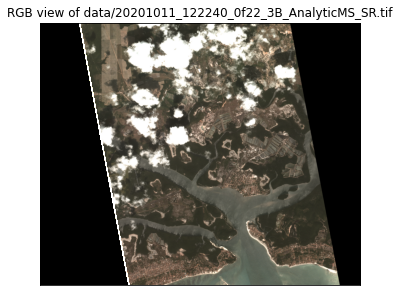

In [118]:
fp = r'data/20201011_122240_0f22_3B_AnalyticMS_SR.tif'

display_window_rgb(fp, aoi_window)

In [ ]:
[ 288074.46334392 9131540.40955765  298602.68157371 9160321.69252901],
 277932.0, bottom=9145185.0, right= 304629.0, top=  9158031.0)